In [1]:
import numpy as np
from keras.applications import *
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.models import Model
%matplotlib inline

Using TensorFlow backend.


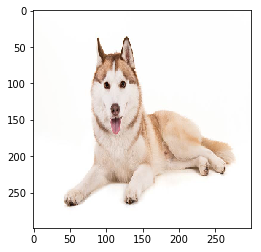

(1, 299, 299, 3)


In [2]:
img_path = './husky.jpg'
img = image.load_img(img_path, target_size=(299, 299))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
# img_tensor = preprocess_input(img_tensor)
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [3]:
classifier = Xception(input_shape=(299, 299, 3), weights='imagenet')

W0723 21:43:00.271917 140596016465792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 21:43:00.308072 140596016465792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 21:43:00.314134 140596016465792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 21:43:00.349662 140596016465792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0723 21:43:00.350441 1405960164

91889664/91884032 [==============================] - 3s 0us/step


In [0]:
layer_outputs = [layer.output for layer in classifier.layers[1:16]]

activation_model = Model(inputs=classifier.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor, batch_size=10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


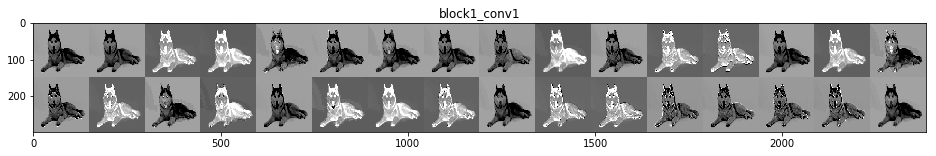

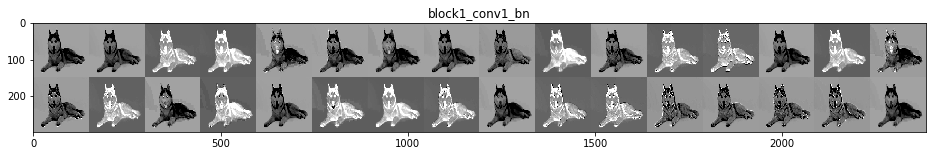

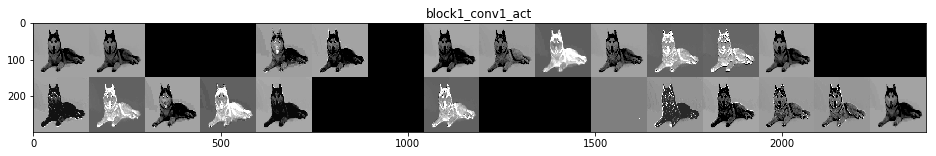

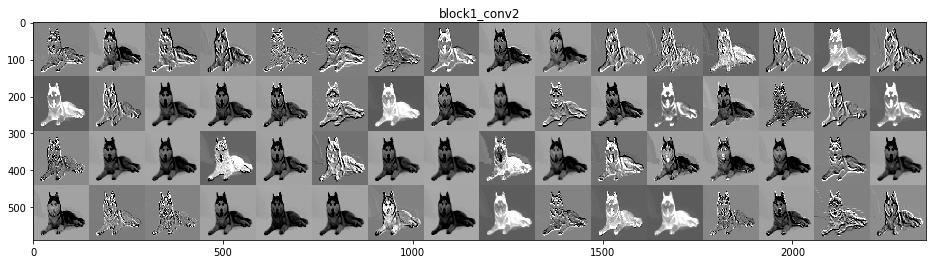

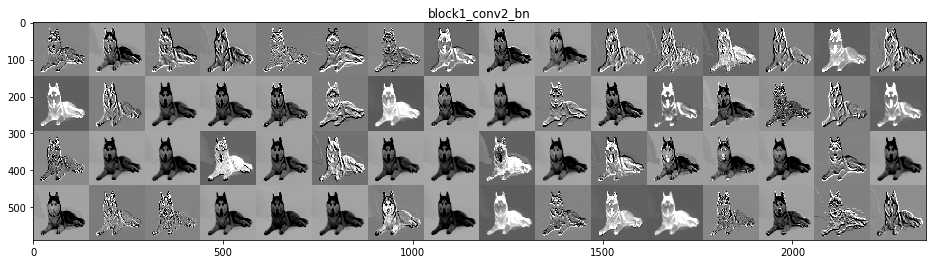

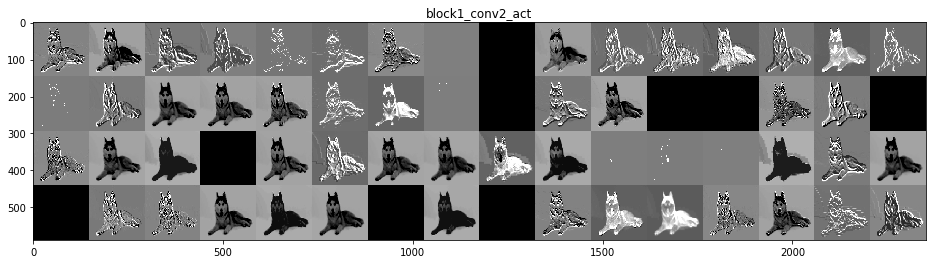

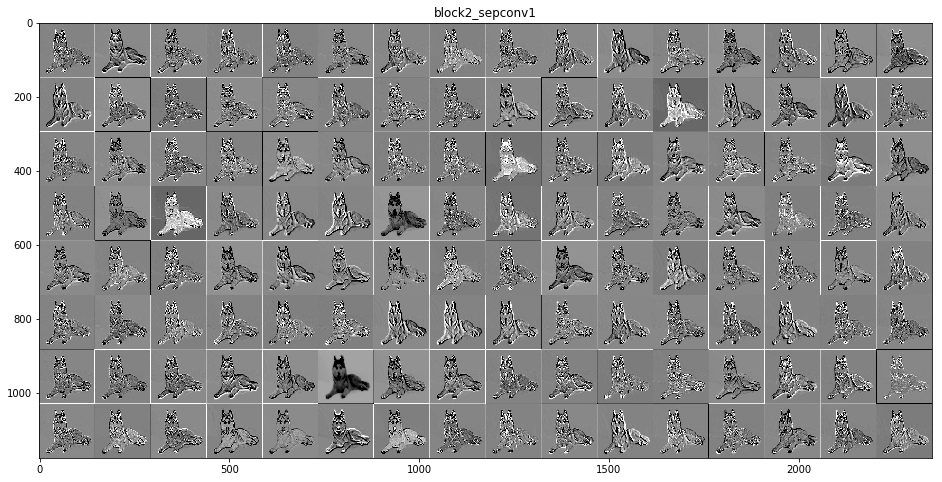

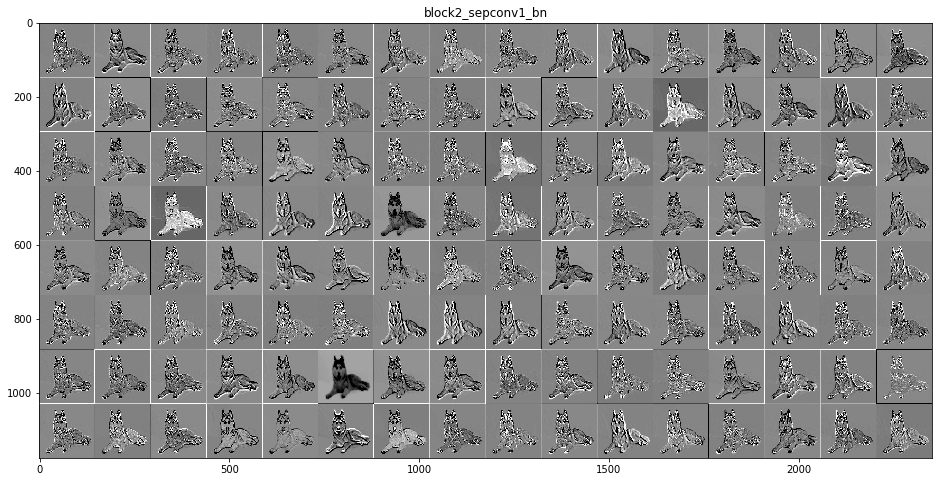

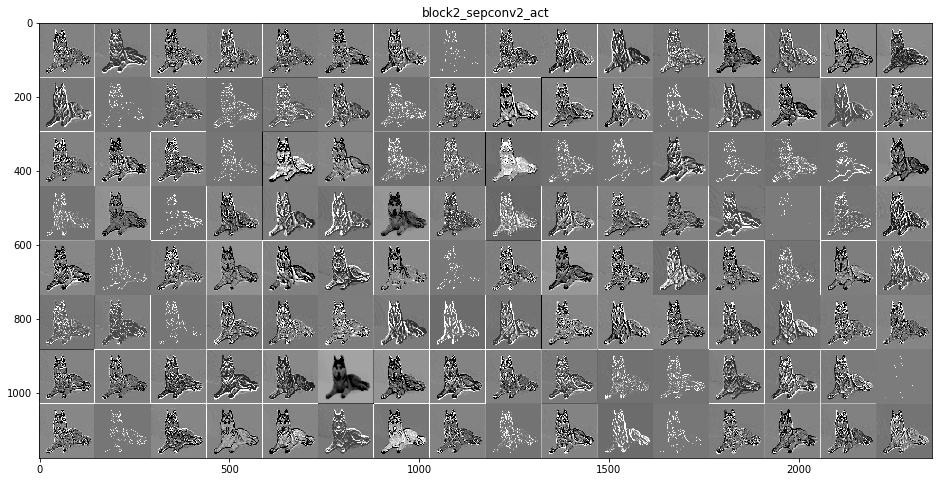

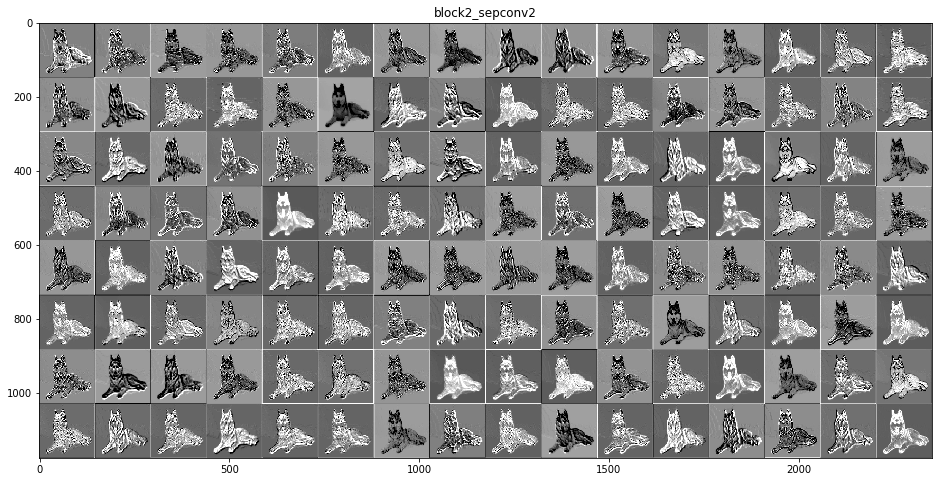

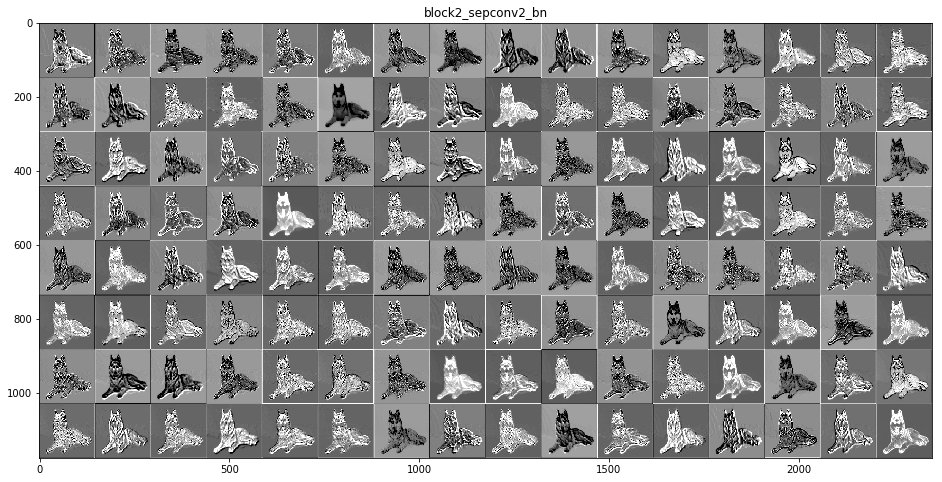

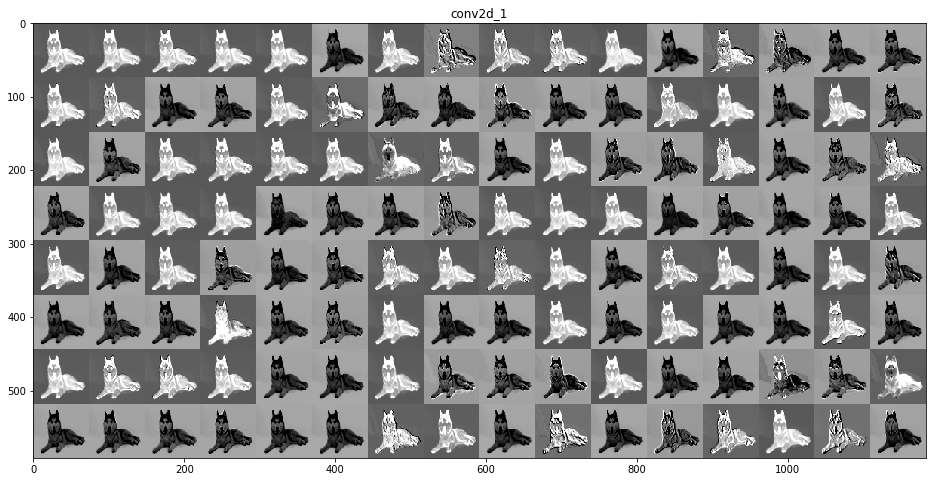

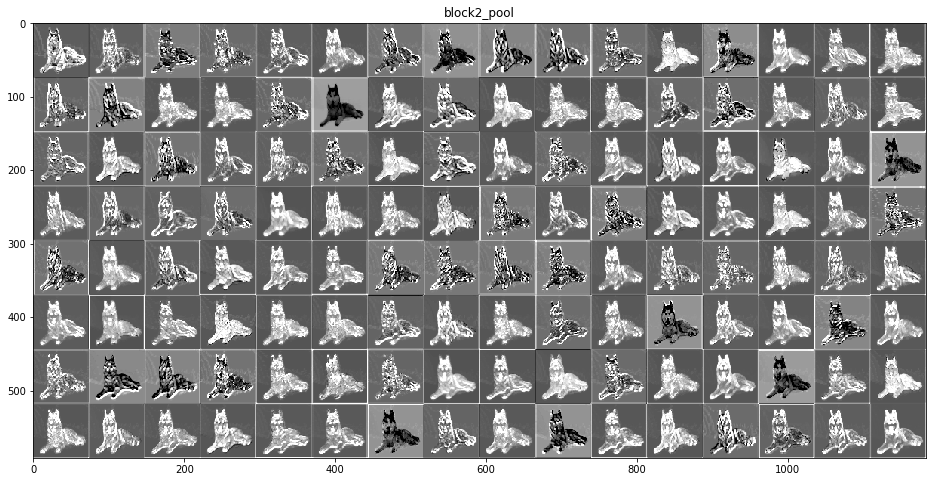

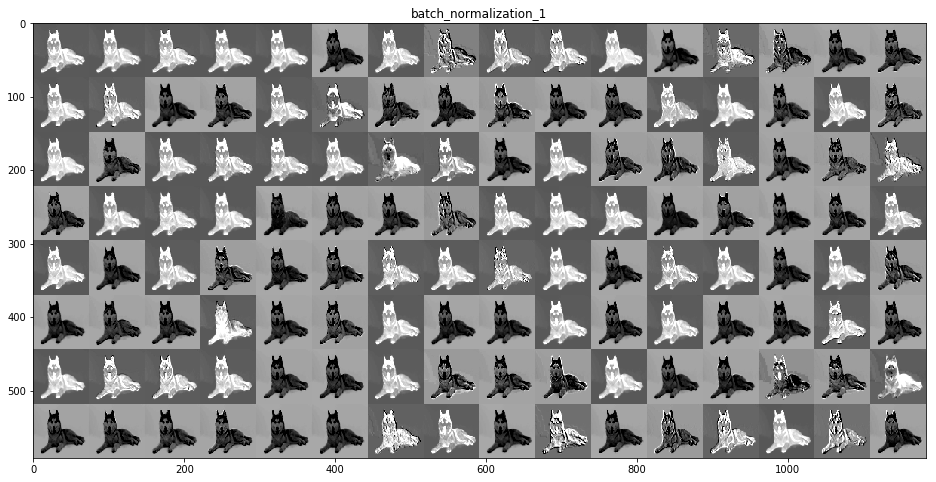

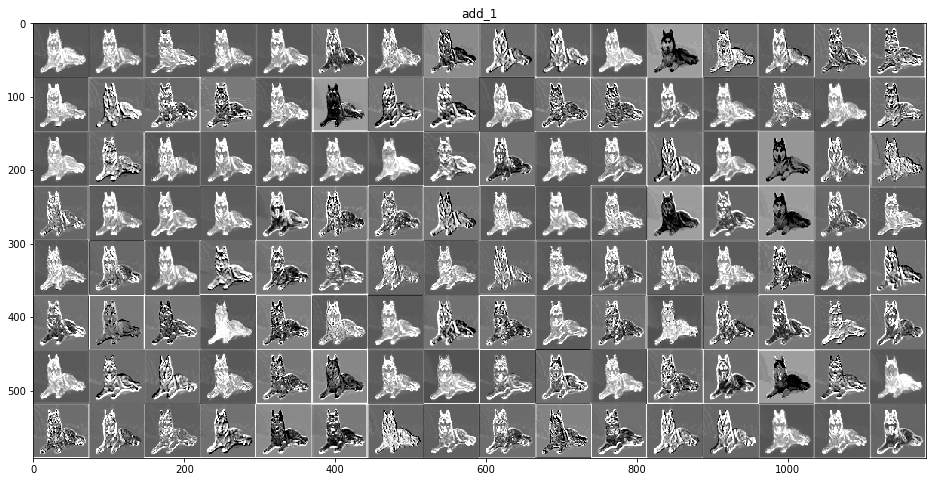

In [5]:
layer_names = []
for layer in classifier.layers[1:16]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')

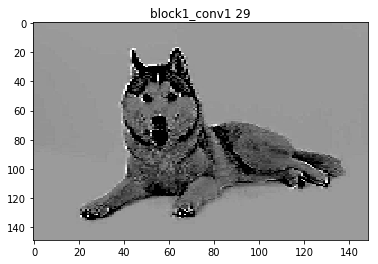

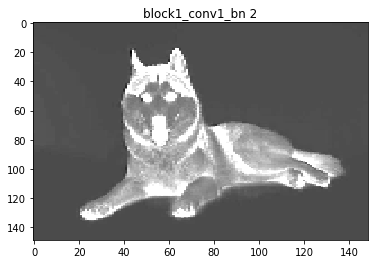

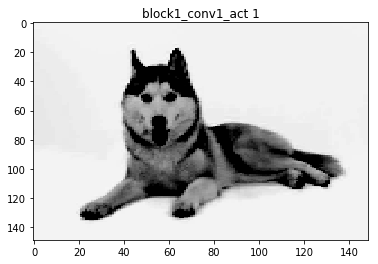

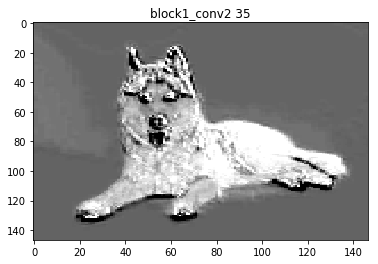

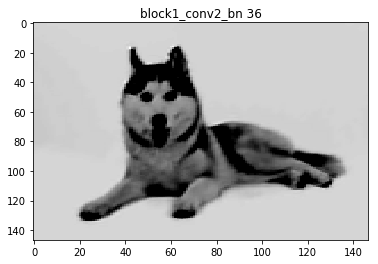

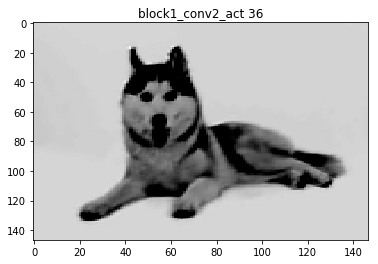

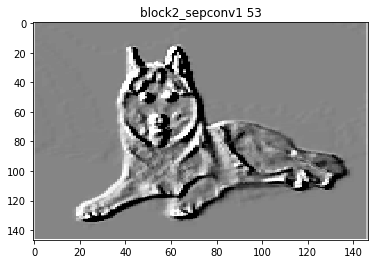

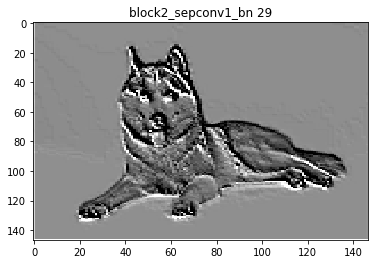

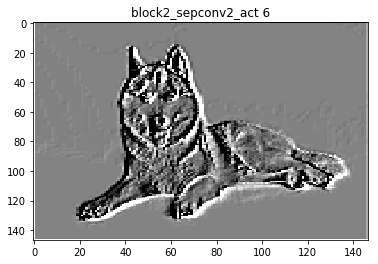

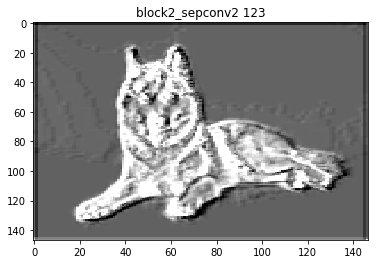

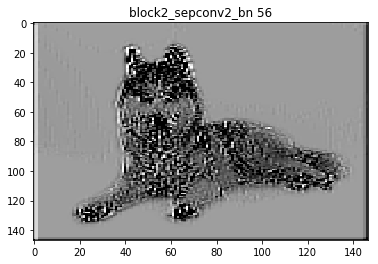

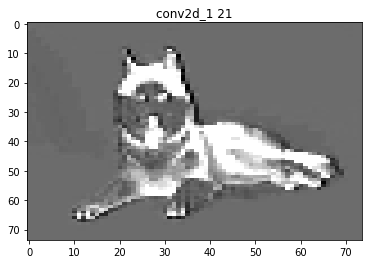

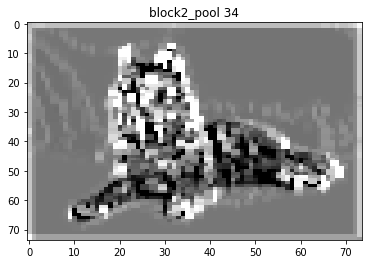

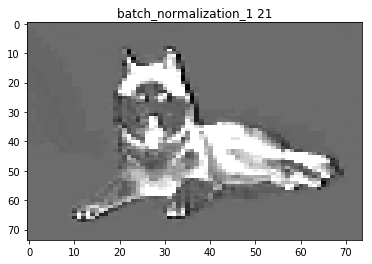

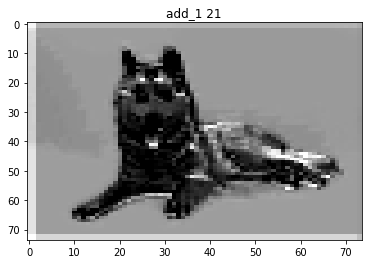

In [6]:
layer_names = []
for layer in classifier.layers[1:16]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    max_act = 0.0
    fltr = 0
    for i in range(n_features):
        channel_image = layer_activation[0, :, :, i]
        cur_act = channel_image.mean().item()
        if max_act < cur_act:
            max_act = cur_act
            fltr = i
    display_image = layer_activation[0, :, :, fltr]
    display_image -= display_image.mean()
    display_image /= display_image.std()
    display_image *= 64
    display_image += 128
    display_image = np.clip(display_image, 0, 255).astype('uint8')
    plt.title(layer_name +' ' + str(fltr))
    plt.imshow(display_image, aspect='auto', cmap='gray')
    plt.pause(.1)
    plt.draw